In [42]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [43]:
df = pd.read_csv("datos/datos_ingeridos/hospital_santiago_dab613af-da86-4668-af09-e169fbdb42ee.csv")

df

,paciente_id,nombre,apellido,edad,sexo,comuna,servicio_clinico,fecha_ingreso,diagnostico_principal,dias_hospitalizacion,costo_total,medico_tratante,estado_alta
0,1,María,González,45,F,Santiago,Medicina Interna,2024-01-15,Hipertensión arterial,3,450000,Dr. Rodríguez,Alta médica
1,2,Juan,Pérez,67,M,Providencia,Cardiología,2024-01-18,Infarto agudo miocardio,7,1200000,Dr. Silva,Alta médica
2,3,Carmen,López,34,F,Las Condes,Ginecología,2024-01-20,Parto normal,2,350000,Dra. Morales,Alta médica
3,4,Pedro,Martínez,78,M,Ñuñoa,Neurología,2024-01-22,Accidente cerebrovascular,12,2100000,Dr. Torres,Alta médica
4,5,Ana,Jiménez,29,F,La Reina,Traumatología,2024-01-25,Fractura de tibia,5,800000,Dr. Vargas,Alta médica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,276,Eduardo,Cortez,66,M,Huechuraba,Medicina Interna,2025-09-05,Síndrome de Goodpasture,13,3200000,Dr. Rodríguez,Fallecido
276,277,Mónica,Vásquez,29,F,Conchalí,Urología,2025-09-07,Síndrome de Alport,8,1450000,Dr. Aguirre,Alta médica
277,278,Fernando,Salazar,47,M,Recoleta,Gastroenterología,2025-09-09,Hepatitis autoinmune,10,2200000,Dr. Castro,Alta médica
278,279,Daniela,Torres,35,F,Estación Central,Cardiología,2025-09-11,Síndrome de QT largo,7,1350000,Dr. Silva,Alta médica


In [44]:
df.shape

(280, 13)

In [45]:
df.isnull().sum()

paciente_id              0
nombre                   0
apellido                 0
edad                     0
sexo                     0
comuna                   0
servicio_clinico         0
fecha_ingreso            0
diagnostico_principal    0
dias_hospitalizacion     0
costo_total              0
medico_tratante          0
estado_alta              0
dtype: int64

In [46]:
#Se muestra df con duplicados, en este caso no hay, por eso está vacío
df_duplicados = df[df.duplicated()]
df_duplicados

,paciente_id,nombre,apellido,edad,sexo,comuna,servicio_clinico,fecha_ingreso,diagnostico_principal,dias_hospitalizacion,costo_total,medico_tratante,estado_alta


In [47]:
# Selecciono solo las columnas numéricas
cols_num = df.select_dtypes(include=np.number)

# Usaré estrategia de promedio
imputer = SimpleImputer(strategy='mean')

# El imputer "aprende" la media de cada columna y luego rellena los NaN si hay
df[cols_num.columns] = imputer.fit_transform(cols_num)

print("DF con Imputación usando media:")
df

DF con Imputación usando media:


,paciente_id,nombre,apellido,edad,sexo,comuna,servicio_clinico,fecha_ingreso,diagnostico_principal,dias_hospitalizacion,costo_total,medico_tratante,estado_alta
0,1.0,María,González,45.0,F,Santiago,Medicina Interna,2024-01-15,Hipertensión arterial,3.0,450000.0,Dr. Rodríguez,Alta médica
1,2.0,Juan,Pérez,67.0,M,Providencia,Cardiología,2024-01-18,Infarto agudo miocardio,7.0,1200000.0,Dr. Silva,Alta médica
2,3.0,Carmen,López,34.0,F,Las Condes,Ginecología,2024-01-20,Parto normal,2.0,350000.0,Dra. Morales,Alta médica
3,4.0,Pedro,Martínez,78.0,M,Ñuñoa,Neurología,2024-01-22,Accidente cerebrovascular,12.0,2100000.0,Dr. Torres,Alta médica
4,5.0,Ana,Jiménez,29.0,F,La Reina,Traumatología,2024-01-25,Fractura de tibia,5.0,800000.0,Dr. Vargas,Alta médica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,276.0,Eduardo,Cortez,66.0,M,Huechuraba,Medicina Interna,2025-09-05,Síndrome de Goodpasture,13.0,3200000.0,Dr. Rodríguez,Fallecido
276,277.0,Mónica,Vásquez,29.0,F,Conchalí,Urología,2025-09-07,Síndrome de Alport,8.0,1450000.0,Dr. Aguirre,Alta médica
277,278.0,Fernando,Salazar,47.0,M,Recoleta,Gastroenterología,2025-09-09,Hepatitis autoinmune,10.0,2200000.0,Dr. Castro,Alta médica
278,279.0,Daniela,Torres,35.0,F,Estación Central,Cardiología,2025-09-11,Síndrome de QT largo,7.0,1350000.0,Dr. Silva,Alta médica


In [48]:
df.dtypes

paciente_id              float64
nombre                    object
apellido                  object
edad                     float64
sexo                      object
comuna                    object
servicio_clinico          object
fecha_ingreso             object
diagnostico_principal     object
dias_hospitalizacion     float64
costo_total              float64
medico_tratante           object
estado_alta               object
dtype: object

In [49]:
# Transformar fecha_ingreso a fecha real

df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'])

In [50]:
df.dtypes

paciente_id                     float64
nombre                           object
apellido                         object
edad                            float64
sexo                             object
comuna                           object
servicio_clinico                 object
fecha_ingreso            datetime64[ns]
diagnostico_principal            object
dias_hospitalizacion            float64
costo_total                     float64
medico_tratante                  object
estado_alta                      object
dtype: object

In [51]:
df.drop('paciente_id', axis=1, inplace=True)

In [52]:
df.describe()

,edad,fecha_ingreso,dias_hospitalizacion,costo_total
count,280.000000,280,280.000000,2.800000e+02
mean,47.564286,2024-11-29 11:34:17.142857216,8.471429,1.828964e+06
min,25.000000,2024-01-15 00:00:00,1.000000,1.200000e+05
25%,36.000000,2024-07-09 12:00:00,5.000000,6.500000e+05
50%,47.000000,2024-12-08 00:00:00,8.000000,1.180000e+06
75%,58.000000,2025-04-26 12:00:00,12.000000,2.800000e+06
max,78.000000,2025-09-13 00:00:00,22.000000,7.200000e+06
std,13.362715,NaN,4.796867,1.545130e+06


In [53]:
text_cols = df.select_dtypes(include= ['object','category']).columns

for col in text_cols:
    print(f"\nValores más frecuentes para {col}")
    print(df[col].value_counts().head(5))


Valores más frecuentes para nombre
nombre
Patricia    14
Carmen      12
Carlos      12
Gloria      12
Fernando    11
Name: count, dtype: int64

Valores más frecuentes para apellido
apellido
Núñez       7
Torres      5
Campos      4
Guerrero    4
Jiménez     4
Name: count, dtype: int64

Valores más frecuentes para sexo
sexo
F    140
M    140
Name: count, dtype: int64

Valores más frecuentes para comuna
comuna
Santiago       7
Providencia    7
Las Condes     7
Ñuñoa          7
La Reina       7
Name: count, dtype: int64

Valores más frecuentes para servicio_clinico
servicio_clinico
Medicina Interna     63
Traumatología        38
Cardiología          34
Neurología           29
Gastroenterología    25
Name: count, dtype: int64

Valores más frecuentes para diagnostico_principal
diagnostico_principal
Síndrome ovario poliquístico    2
Enfermedad de Crohn             2
Lupus eritematoso               2
Insuficiencia cardíaca          2
Artritis reumatoide             2
Name: count, dtype: int6

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

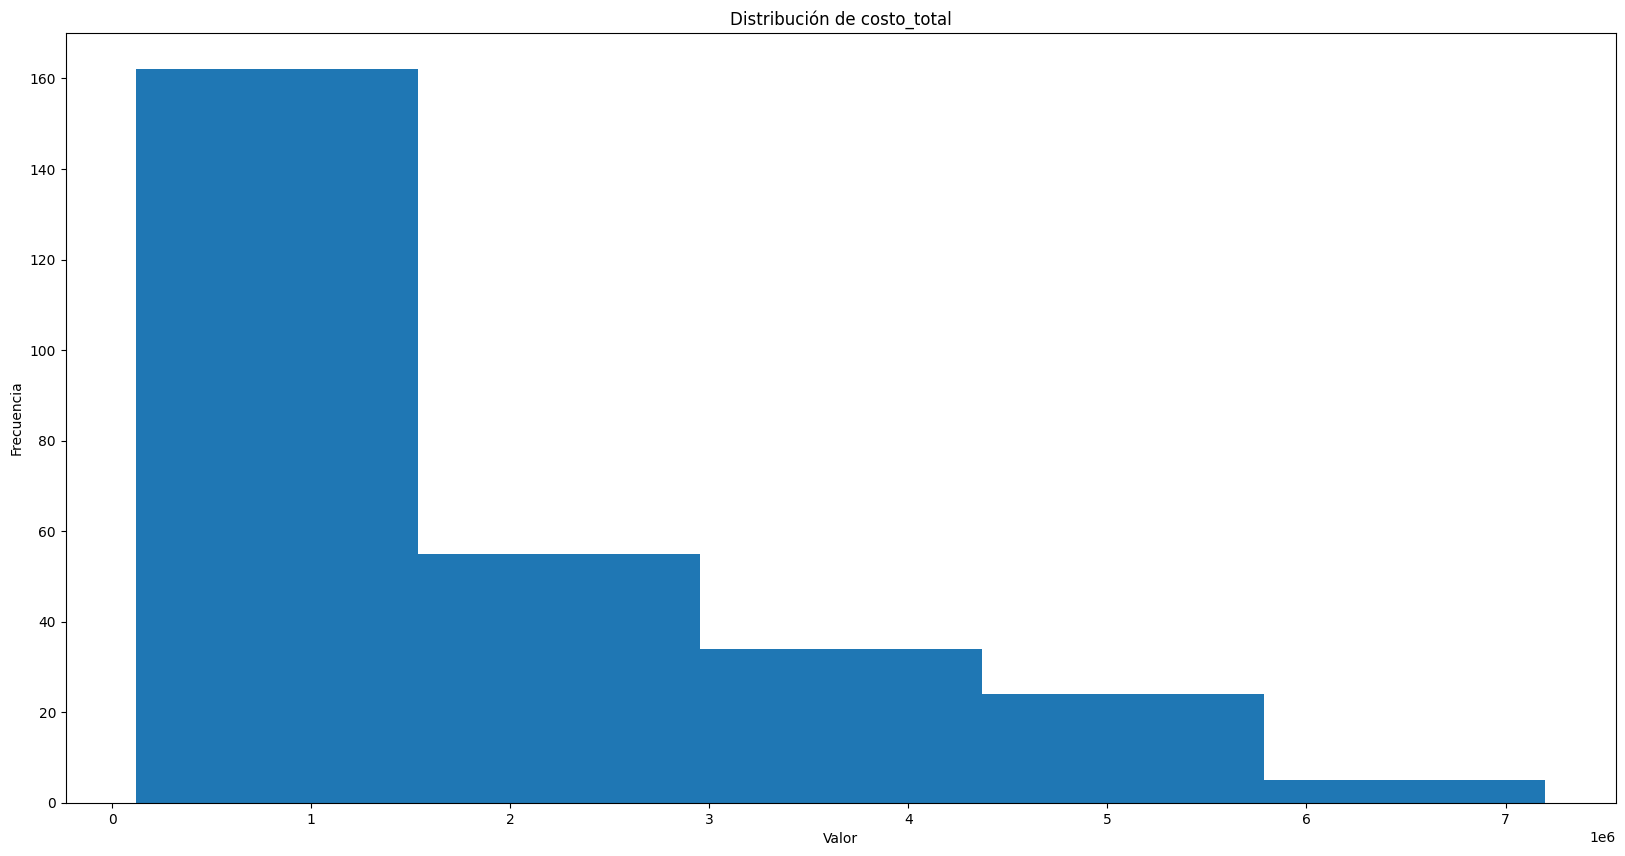

In [55]:
# Gráfico de distribución de columna numérica
df['costo_total'].plot(kind='hist', bins=5, figsize=(20,10))
plt.title("Distribución de costo_total")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

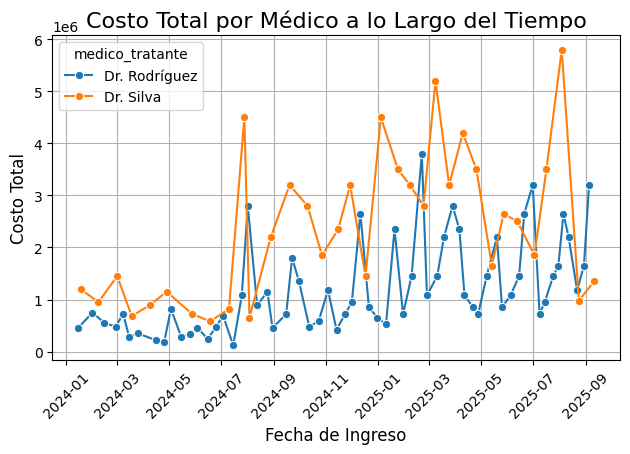

In [59]:
doctores_seleccionados = ['Dr. Rodríguez','Dr. Silva']
df_filtrado = df[df['medico_tratante'].isin(doctores_seleccionados)]

sns.lineplot(data=df_filtrado, x='fecha_ingreso', y='costo_total',hue='medico_tratante', marker='o')

# Añadir títulos y etiquetas para mayor claridad
plt.title('Costo Total por Médico a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha de Ingreso', fontsize=12)
plt.ylabel('Costo Total', fontsize=12)
plt.xticks(rotation=45) # Rotar las fechas para que no se superpongan
plt.grid(True) # Añadir una grilla para facilitar la lectura
plt.tight_layout() # Ajustar el gráfico para que todo quepa correctamente

# Mostrar el gráfico
plt.show()

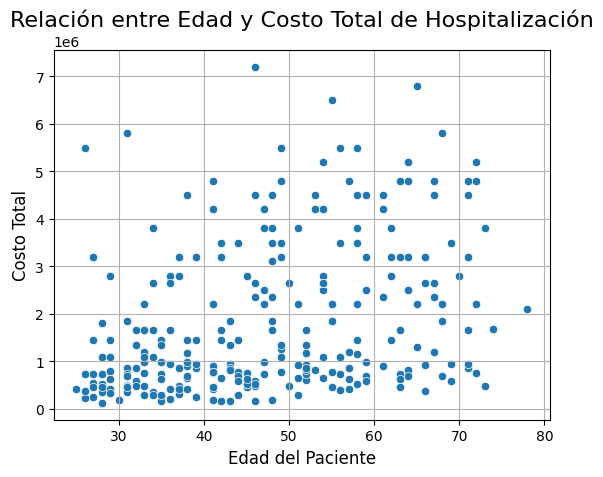

In [57]:
sns.scatterplot(data=df, x='edad', y='costo_total', marker='o')

plt.title('Relación entre Edad y Costo Total de Hospitalización', fontsize=16)
plt.xlabel('Edad del Paciente', fontsize=12)
plt.ylabel('Costo Total', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.show()